# **Exploratory Data Analysis Theory Digital Assignment**



## NAME : HANSINI VADDEY

##    REGD : 21BDS0345

# MODULE 1

In [1]:
import pandas as pd

# Load the uploaded dataset

data = pd.read_csv('SuicideChina (1).csv')

# Display the first few rows and basic info to understand the structure of the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rownames      2571 non-null   int64 
 1   Person_ID     2571 non-null   int64 
 2   Hospitalised  2571 non-null   object
 3   Died          2571 non-null   object
 4   Urban         2571 non-null   object
 5   Year          2571 non-null   int64 
 6   Month         2571 non-null   int64 
 7   Sex           2571 non-null   object
 8   Age           2571 non-null   int64 
 9   Education     2571 non-null   object
 10  Occupation    2571 non-null   object
 11  method        2571 non-null   object
dtypes: int64(5), object(7)
memory usage: 241.2+ KB


(   rownames  Person_ID Hospitalised Died Urban  Year  Month     Sex  Age  \
 0         1          1          yes   no    no  2010     12  female   39   
 1         2          2           no  yes    no  2009      3    male   83   
 2         3          3           no  yes    no  2010      2    male   60   
 3         4          4           no  yes    no  2011      1    male   73   
 4         5          5          yes   no    no  2009      8    male   51   
 
    Education Occupation        method  
 0  Secondary  household  Other poison  
 1    primary    farming       Hanging  
 2    primary    farming       Hanging  
 3    primary    farming       Hanging  
 4  Secondary    farming     Pesticide  ,
 None)

In [2]:
# Classify data types
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Further classify numerical data into discrete and continuous
# Discrete: Countable, distinct values
# Continuous: Measurable values (e.g., Age can be continuous in a different dataset context)

discrete_cols = [col for col in numerical_cols if data[col].nunique() < 20]  # Arbitrary threshold for discrete
continuous_cols = [col for col in numerical_cols if col not in discrete_cols]

numerical_cols, discrete_cols, continuous_cols, categorical_cols


(['rownames', 'Person_ID', 'Year', 'Month', 'Age'],
 ['Year', 'Month'],
 ['rownames', 'Person_ID', 'Age'],
 ['Hospitalised', 'Died', 'Urban', 'Sex', 'Education', 'Occupation', 'method'])

In [3]:
# Classify columns by data type
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['rownames', 'Person_ID', 'Year', 'Month', 'Age']
Categorical Columns: ['Hospitalised', 'Died', 'Urban', 'Sex', 'Education', 'Occupation', 'method']


In [4]:
# Further classify numerical data
discrete_cols = [col for col in numerical_cols if data[col].nunique() < 20]  # Arbitrary threshold for discrete
continuous_cols = [col for col in numerical_cols if col not in discrete_cols]

print("Discrete Columns:", discrete_cols)
print("Continuous Columns:", continuous_cols)


Discrete Columns: ['Year', 'Month']
Continuous Columns: ['rownames', 'Person_ID', 'Age']


In [5]:
# Example classification
nominal_cols = ['Hospitalised', 'Died', 'Urban', 'Sex', 'Occupation', 'method']
ordinal_cols = ['Education']  # Assuming order like primary < secondary < higher
interval_cols = ['Year']
ratio_cols = ['Age']

print("Nominal:", nominal_cols)
print("Ordinal:", ordinal_cols)
print("Interval:", interval_cols)
print("Ratio:", ratio_cols)


Nominal: ['Hospitalised', 'Died', 'Urban', 'Sex', 'Occupation', 'method']
Ordinal: ['Education']
Interval: ['Year']
Ratio: ['Age']


In [6]:
# Summary statistics
print(data[numerical_cols].describe())


          rownames    Person_ID         Year        Month          Age
count  2571.000000  2571.000000  2571.000000  2571.000000  2571.000000
mean   1286.000000  1286.000000  2010.045508     6.298327    52.630883
std     742.328095   742.328095     0.791412     3.202515    19.783878
min       1.000000     1.000000  2009.000000     1.000000    12.000000
25%     643.500000   643.500000  2009.000000     4.000000    37.000000
50%    1286.000000  1286.000000  2010.000000     6.000000    53.000000
75%    1928.500000  1928.500000  2011.000000     9.000000    69.000000
max    2571.000000  2571.000000  2011.000000    12.000000   100.000000


In [8]:
# Frequency counts for categorical columns
for col in categorical_cols:
    print(f"Value counts for {col}:\n", data[col].value_counts())


Value counts for Hospitalised:
 Hospitalised
yes    1553
no     1018
Name: count, dtype: int64
Value counts for Died:
 Died
no     1315
yes    1256
Name: count, dtype: int64
Value counts for Urban:
 Urban
no         2213
yes         277
unknown      81
Name: count, dtype: int64
Value counts for Sex:
 Sex
female    1328
male      1243
Name: count, dtype: int64
Value counts for Education:
 Education
Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: count, dtype: int64
Value counts for Occupation:
 Occupation
farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker                 6
others                 3
retiree                3
Name: count, dtype: int64
Value counts for method:
 method
Pesticide        1768
Hanging           431
Other poison      146
Poison unspec     107
unspecified        48
Cutting            29
D

# MODULE 2

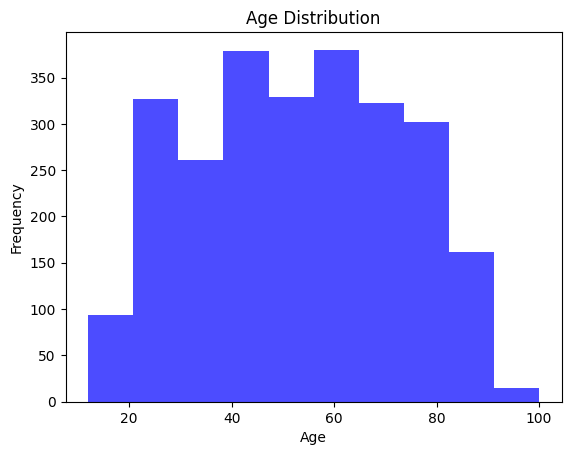

<ipython-input-9-5e38acd8a7f4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sex', palette='Set2')


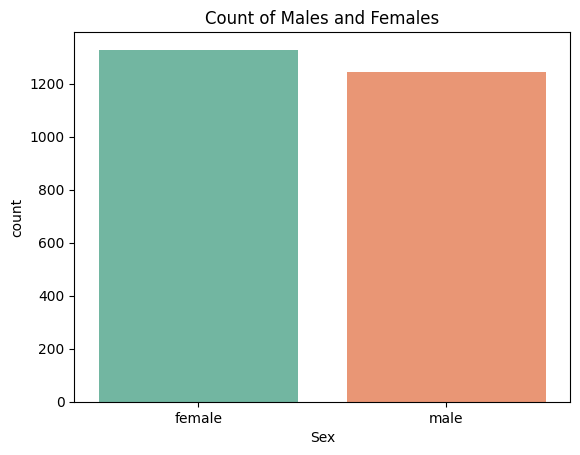

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age (Continuous Data)
plt.hist(data['Age'], bins=10, color='blue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot for a Categorical Column (e.g., Sex)
sns.countplot(data=data, x='Sex', palette='Set2')
plt.title('Count of Males and Females')
plt.show()


In [10]:
# Classical Statistics
mean_age = data['Age'].mean()
median_age = data['Age'].median()
mode_age = data['Age'].mode()[0]

print(f"Mean Age: {mean_age}, Median Age: {median_age}, Mode Age: {mode_age}")


Mean Age: 52.63088292493193, Median Age: 53.0, Mode Age: 40


In [11]:
# Remove duplicate rows
deduplicated_data = data.drop_duplicates()
print(f"Original data size: {data.shape}")
print(f"Deduplicated data size: {deduplicated_data.shape}")


Original data size: (2571, 12)
Deduplicated data size: (2571, 12)


In [ ]:
# Replace specific values (e.g., replace 'yes' with 1 and 'no' with 0 in 'Hospitalised' column)
data['Hospitalised'] = data['Hospitalised'].replace({'yes': 1, 'no': 0})

# Print unique values to confirm changes
print(data['Hospitalised'].unique())


In [12]:
# Binning Age into categories (e.g., 'Child', 'Teen', 'Adult', 'Senior')
bins = [0, 12, 19, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Check distribution of bins
print(data['Age_Group'].value_counts())


Age_Group
Adult     1545
Senior     981
Teen        44
Child        0
Name: count, dtype: int64


In [13]:
# Create equal-width bins for 'Age'
data['Age_Binned'] = pd.cut(data['Age'], bins=5, labels=False)  # 5 equal-width bins
print(data[['Age', 'Age_Binned']].head())


   Age  Age_Binned
0   39           1
1   83           4
2   60           2
3   73           3
4   51           2


In [14]:
# Check for missing values
missing_summary = data.isnull().sum()
print("Missing values per column:\n", missing_summary)


Missing values per column:
 rownames        0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
Age_Group       1
Age_Binned      0
dtype: int64


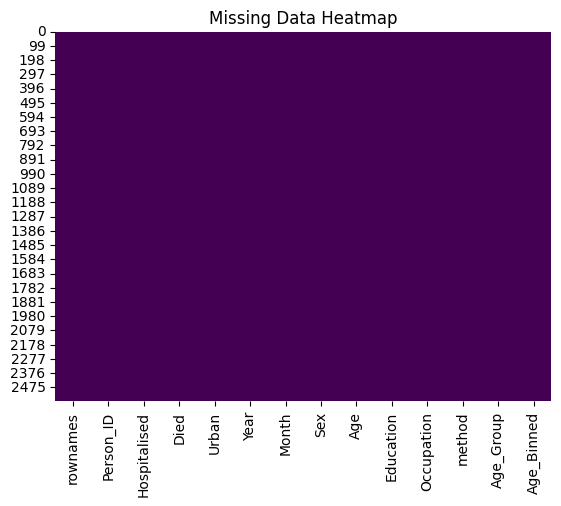

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing data
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [16]:
# Drop rows or columns with missing values
data_dropped = data.dropna()  # Drop rows
data_dropped_cols = data.dropna(axis=1)  # Drop columns

# Impute missing values with mean, median, or mode
data['Age'].fillna(data['Age'].mean(), inplace=True)  # Fill with mean
data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill with median
data['Age'].fillna(data['Age'].mode()[0], inplace=True)  # Fill with mode


<ipython-input-16-019042d295d7>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)  # Fill with mean
<ipython-input-16-019042d295d7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [17]:
import numpy as np
from scipy.stats import norm

# Estimate parameters for 'Age' using MLE
mean_age = data['Age'].mean()
std_dev_age = data['Age'].std()

# Replace missing values in 'Age' with random values based on the estimated distribution
data['Age'] = data['Age'].apply(
    lambda x: np.random.normal(mean_age, std_dev_age) if pd.isnull(x) else x
)

print("Data after MLE-based imputation:\n", data['Age'].head())


Data after MLE-based imputation:
 0    39
1    83
2    60
3    73
4    51
Name: Age, dtype: int64


# MODULE 3

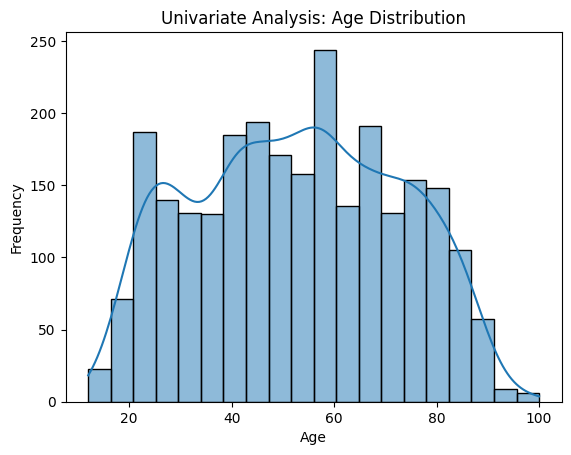

<ipython-input-18-1e89990c697f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sex', palette='viridis')


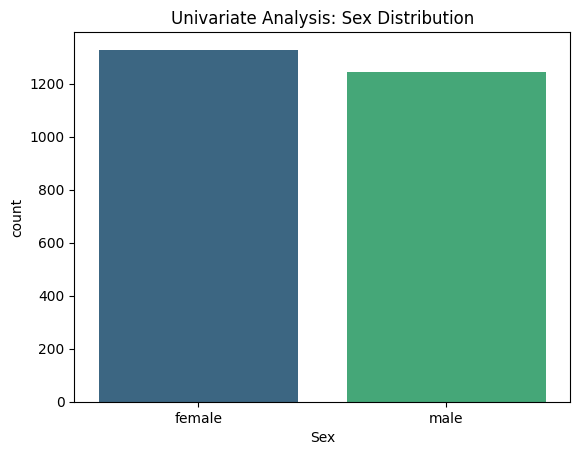

In [18]:
# Example: Distribution of 'Age' (Numerical)
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Univariate Analysis: Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Example: Frequency of 'Sex' (Categorical)
sns.countplot(data=data, x='Sex', palette='viridis')
plt.title('Univariate Analysis: Sex Distribution')
plt.show()


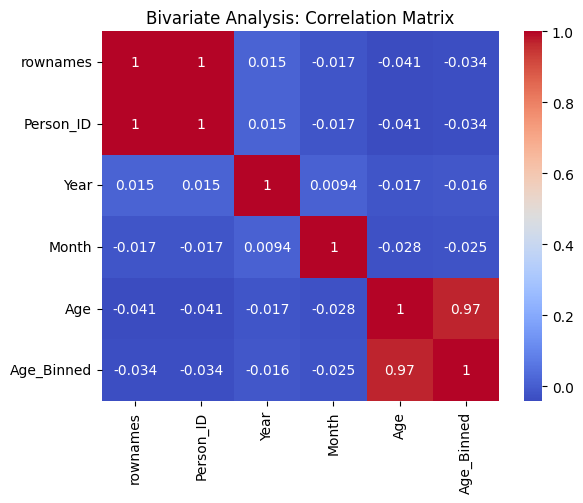

In [21]:
# Example: Correlation Heatmap (Numerical Variables)
# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=np.number)

correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Bivariate Analysis: Correlation Matrix')
plt.show()

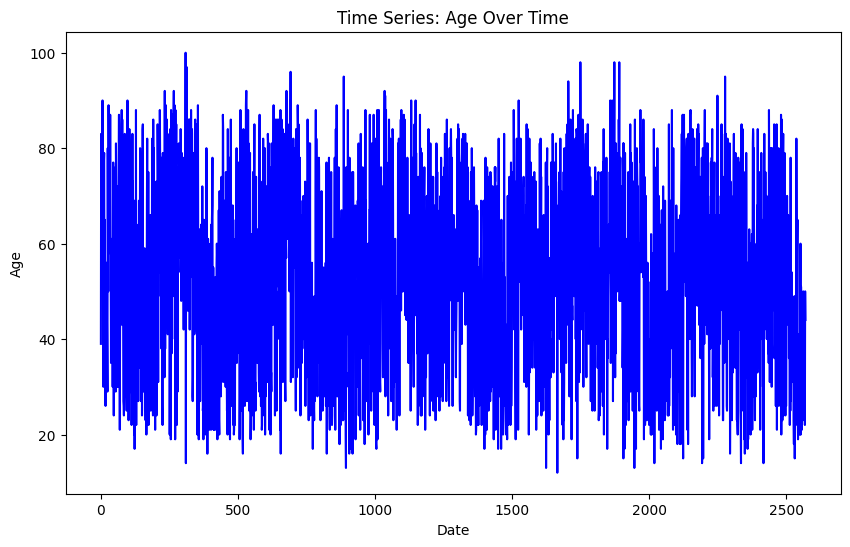

In [24]:
# Line plot for time series data (e.g., Age over time)
data['Age'].plot(title='Time Series: Age Over Time', figsize=(10, 6), color='blue')
plt.xlabel('Date')
plt.ylabel('Age')
plt.show()


In [26]:
# Combine 'Year' and 'Month' into a datetime column if not already done
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str))

# Set the datetime column as the index
data.set_index('Date', inplace=True)


Date
2009-01-01    52.576769
2010-01-01    53.442469
2011-01-01    51.781755
Freq: YS-JAN, Name: Age, dtype: float64


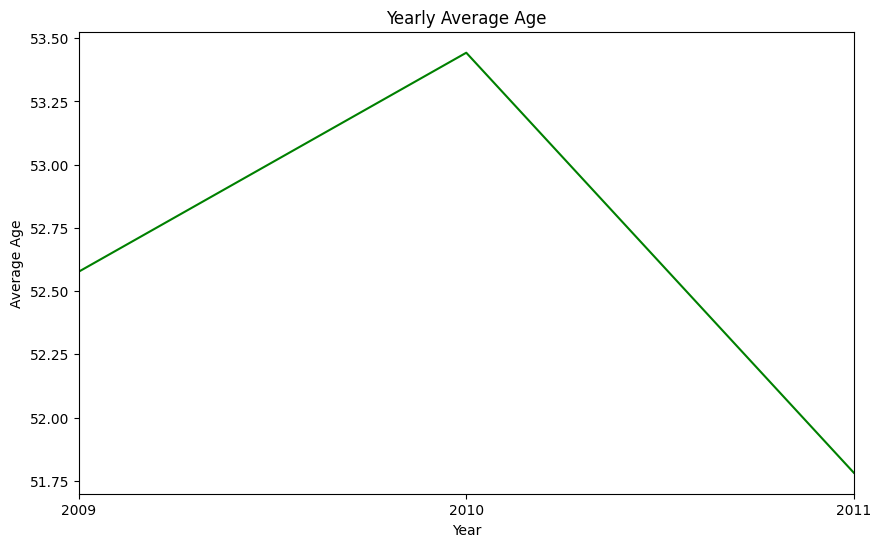

In [27]:
# Resample data yearly and calculate mean Age
yearly_data = data.resample('YS')['Age'].mean()
print(yearly_data)

# Visualize grouped data
yearly_data.plot(title='Yearly Average Age', figsize=(10, 6), color='green')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.show()


# MODULE 4


In [28]:
# Summary statistics
print(data.describe())


          rownames    Person_ID         Year        Month          Age  \
count  2571.000000  2571.000000  2571.000000  2571.000000  2571.000000   
mean   1286.000000  1286.000000  2010.045508     6.298327    52.630883   
std     742.328095   742.328095     0.791412     3.202515    19.783878   
min       1.000000     1.000000  2009.000000     1.000000    12.000000   
25%     643.500000   643.500000  2009.000000     4.000000    37.000000   
50%    1286.000000  1286.000000  2010.000000     6.000000    53.000000   
75%    1928.500000  1928.500000  2011.000000     9.000000    69.000000   
max    2571.000000  2571.000000  2011.000000    12.000000   100.000000   

        Age_Binned  
count  2571.000000  
mean      1.803967  
std       1.176488  
min       0.000000  
25%       1.000000  
50%       2.000000  
75%       3.000000  
max       4.000000  


In [29]:
# Frequency count for each category
for col in data.select_dtypes(include=['object']).columns:
    print(f"Value counts for {col}:\n", data[col].value_counts())


Value counts for Hospitalised:
 Hospitalised
yes    1553
no     1018
Name: count, dtype: int64
Value counts for Died:
 Died
no     1315
yes    1256
Name: count, dtype: int64
Value counts for Urban:
 Urban
no         2213
yes         277
unknown      81
Name: count, dtype: int64
Value counts for Sex:
 Sex
female    1328
male      1243
Name: count, dtype: int64
Value counts for Education:
 Education
Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: count, dtype: int64
Value counts for Occupation:
 Occupation
farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker                 6
others                 3
retiree                3
Name: count, dtype: int64
Value counts for method:
 method
Pesticide        1768
Hanging           431
Other poison      146
Poison unspec     107
unspecified        48
Cutting            29
D

In [30]:
# Statistical measures
mean_age = data['Age'].mean()
median_age = data['Age'].median()
std_dev_age = data['Age'].std()

print(f"Mean Age: {mean_age}, Median Age: {median_age}, Std Dev: {std_dev_age}")


Mean Age: 52.63088292493193, Median Age: 53.0, Std Dev: 19.783878079538813


In [31]:
# Statistical measures
mean_age = data['Age'].mean()
median_age = data['Age'].median()
std_dev_age = data['Age'].std()

print(f"Mean Age: {mean_age}, Median Age: {median_age}, Std Dev: {std_dev_age}")


Mean Age: 52.63088292493193, Median Age: 53.0, Std Dev: 19.783878079538813


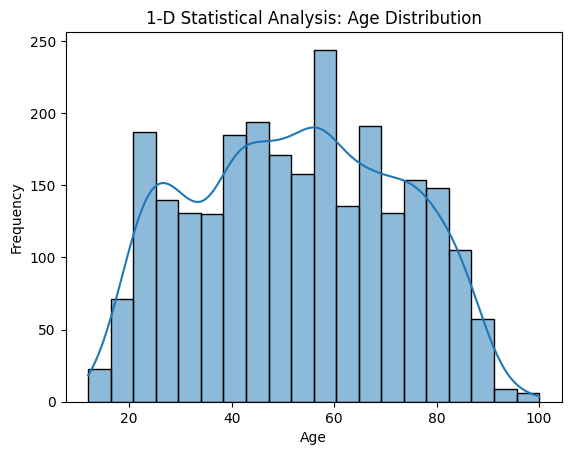

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Age
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('1-D Statistical Analysis: Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


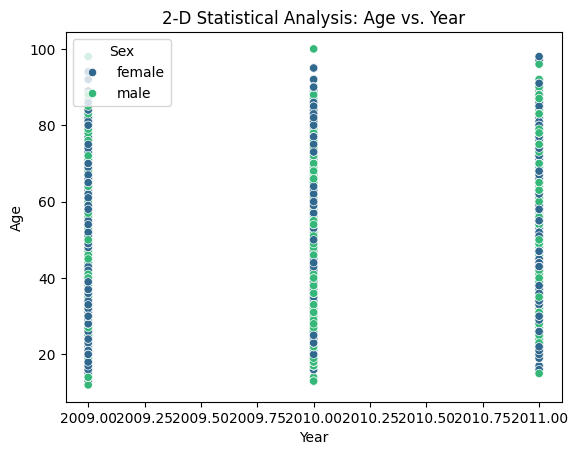

Correlation Matrix:
            Age      Year
Age   1.000000 -0.017267
Year -0.017267  1.000000


In [33]:
# Scatter plot
sns.scatterplot(data=data, x='Year', y='Age', hue='Sex', palette='viridis')
plt.title('2-D Statistical Analysis: Age vs. Year')
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()

# Correlation matrix
correlation_matrix = data[['Age', 'Year']].corr()
print("Correlation Matrix:\n", correlation_matrix)


In [33]:
# Scatter plot
sns.scatterplot(data=data, x='Year', y='Age', hue='Sex', palette='viridis')
plt.title('2-D Statistical Analysis: Age vs. Year')
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()

# Correlation matrix
correlation_matrix = data[['Age', 'Year']].corr()
print("Correlation Matrix:\n", correlation_matrix)


In [34]:
# Contingency table for two categorical variables
contingency_table = pd.crosstab(data['Sex'], data['Hospitalised'])
print("Contingency Table:\n", contingency_table)


Contingency Table:
 Hospitalised   no  yes
Sex                   
female        469  859
male          549  694


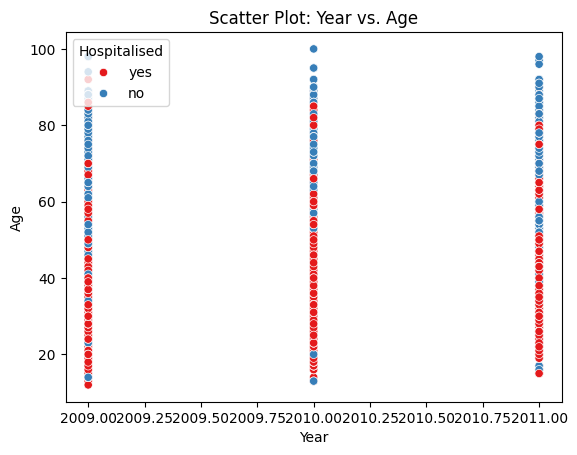

In [36]:
# Scatter plot
sns.scatterplot(data=data, x='Year', y='Age', hue='Hospitalised', palette='Set1')
plt.title('Scatter Plot: Year vs. Age')
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()


<ipython-input-37-a8772c0712f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x='Sex', y='Age', jitter=True, palette='Set2')


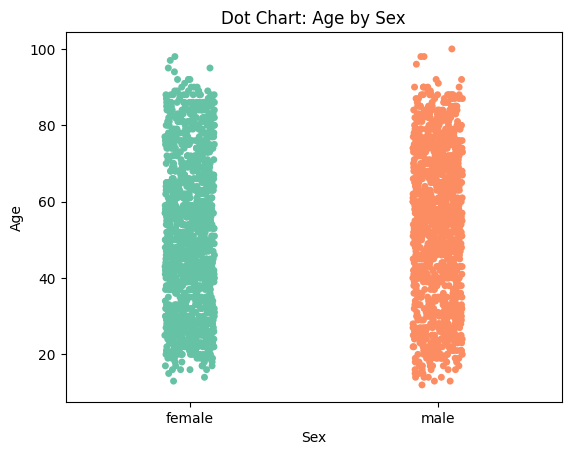

In [37]:
# Dot chart (strip plot)
sns.stripplot(data=data, x='Sex', y='Age', jitter=True, palette='Set2')
plt.title('Dot Chart: Age by Sex')
plt.show()


<ipython-input-38-c9552f2568ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sex', palette='Set3')


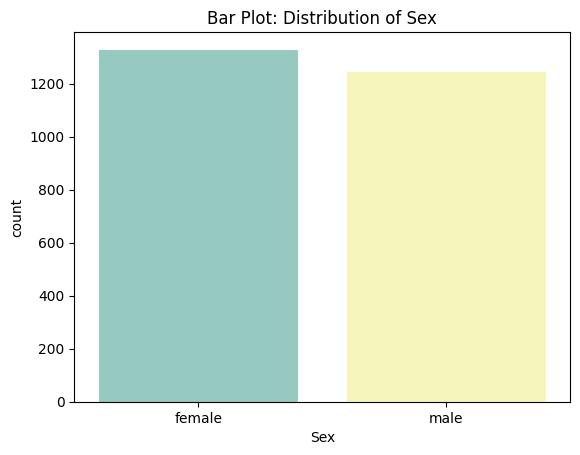

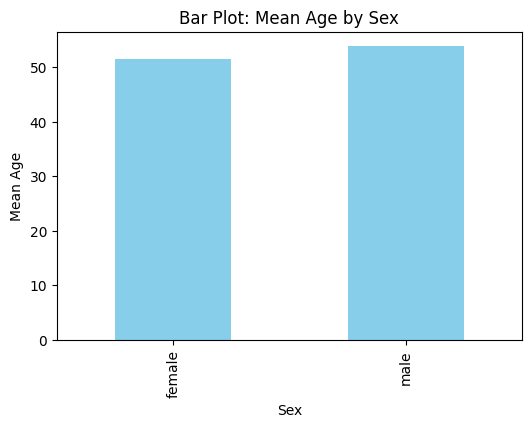

In [38]:
# Bar plot for categorical data (e.g., Sex)
sns.countplot(data=data, x='Sex', palette='Set3')
plt.title('Bar Plot: Distribution of Sex')
plt.show()

# Bar plot with aggregation (e.g., Mean Age by Sex)
data.groupby('Sex')['Age'].mean().plot(kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Bar Plot: Mean Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Mean Age')
plt.show()


<ipython-input-39-c9552f2568ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sex', palette='Set3')


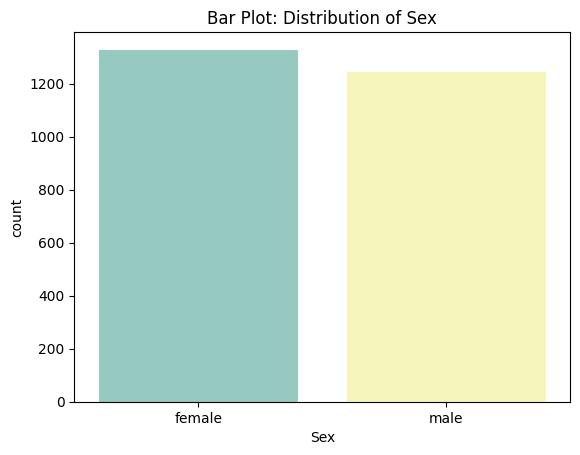

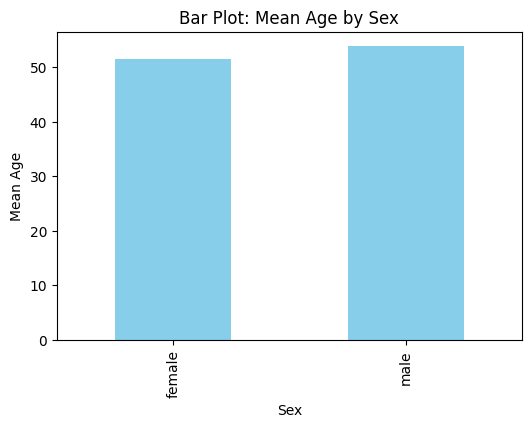

In [39]:
# Bar plot for categorical data (e.g., Sex)
sns.countplot(data=data, x='Sex', palette='Set3')
plt.title('Bar Plot: Distribution of Sex')
plt.show()

# Bar plot with aggregation (e.g., Mean Age by Sex)
data.groupby('Sex')['Age'].mean().plot(kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Bar Plot: Mean Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Mean Age')
plt.show()


# MODULE 5

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


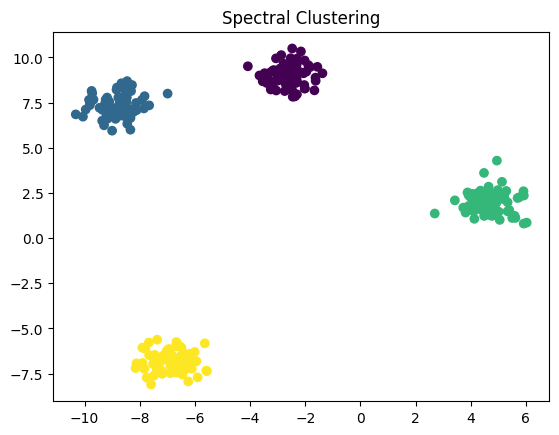

In [40]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Spectral Clustering")
plt.show()


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Sample documents
documents = [
    "Data science is fascinating.",
    "Machine learning is a subset of AI.",
    "Clustering is an unsupervised learning technique.",
    "Spectral clustering is powerful.",
    "Text analysis uses TF-IDF for document clustering."
]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Display results
for i, doc in enumerate(documents):
    print(f"Document: {doc}, Cluster: {labels[i]}")


Document: Data science is fascinating., Cluster: 1
Document: Machine learning is a subset of AI., Cluster: 0
Document: Clustering is an unsupervised learning technique., Cluster: 0
Document: Spectral clustering is powerful., Cluster: 1
Document: Text analysis uses TF-IDF for document clustering., Cluster: 1


<ipython-input-42-24ac75e5162d>:11: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance, method='single')


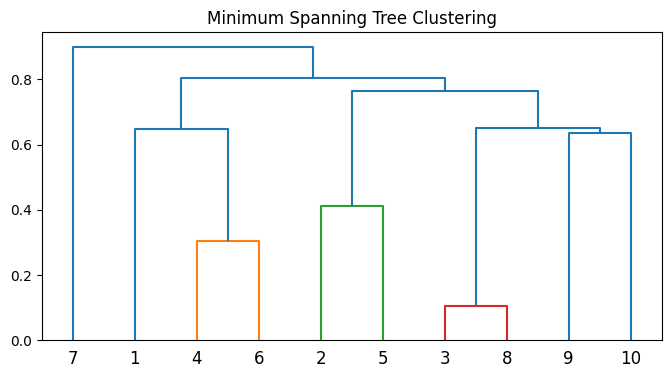

In [42]:
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

# Generate synthetic data
np.random.seed(42)
data = np.random.rand(10, 2)

# Compute distance matrix and Minimum Spanning Tree
distance = distance_matrix(data, data)
linked = linkage(distance, method='single')

# Dendrogram visualization
plt.figure(figsize=(8, 4))
dendrogram(linked, labels=range(1, 11))
plt.title("Minimum Spanning Tree Clustering")
plt.show()


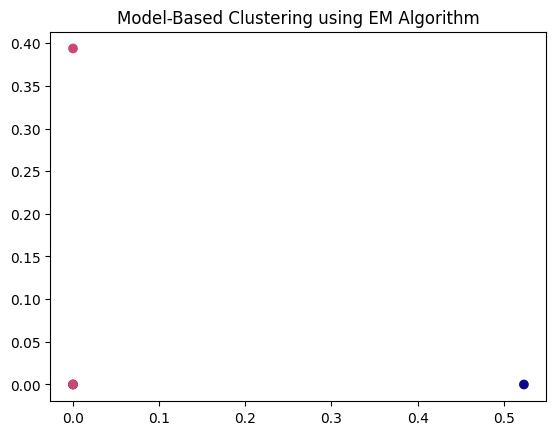

In [44]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
# Convert the sparse matrix to a dense array
X_dense = X.toarray()
gmm_labels = gmm.fit_predict(X_dense)  # Use the dense array

# Visualize clusters
plt.scatter(X_dense[:, 0], X_dense[:, 1], c=gmm_labels, cmap='plasma')  # Use the dense array for visualization
plt.title("Model-Based Clustering using EM Algorithm")
plt.show()

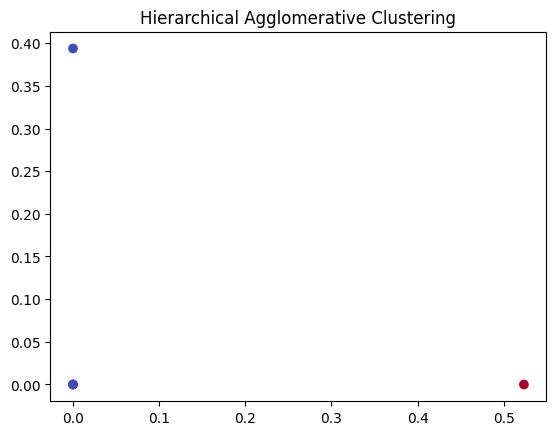

In [48]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Convert sparse matrix to dense (if using TF-IDF or similar)
X_dense = X.toarray()

# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_dense)

# Visualize clusters
plt.scatter(X_dense[:, 0], X_dense[:, 1], c=agg_labels, cmap='coolwarm')
plt.title("Hierarchical Agglomerative Clustering")
plt.show()


# MODULE 6

Explained variance ratio: [0.37743432 0.33646087]


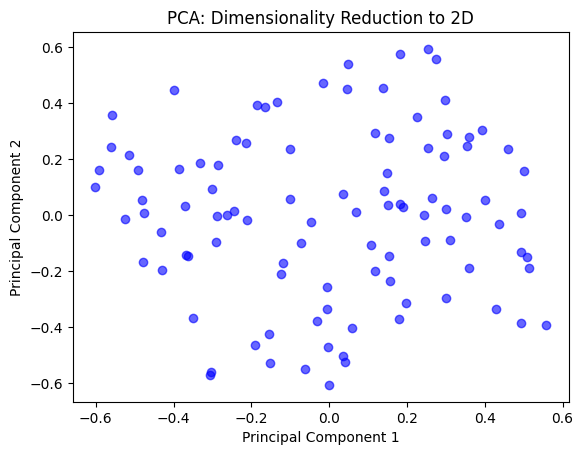

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data for demonstration
np.random.seed(42)
X = np.random.rand(100, 3)  # 3-dimensional data

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Plot PCA-transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.6)
plt.title("PCA: Dimensionality Reduction to 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [53]:
from numpy.linalg import svd

# Perform SVD
U, Sigma, VT = svd(X)

# Print results
print("U matrix:\n", U)
print("Sigma (Singular Values):\n", Sigma)
print("V^T matrix:\n", VT)


U matrix:
 [[-1.32789051e-01  1.62201333e-02 -1.25671825e-01 ... -5.60575455e-02
  -4.65678825e-02 -6.63837575e-02]
 [-5.67562204e-02 -5.30192439e-02  1.18885960e-01 ...  1.95218077e-01
   7.76468653e-02  1.12999308e-01]
 [-9.96001358e-02  3.13921938e-02 -1.87769781e-01 ... -2.65866715e-02
  -1.48297913e-01  5.83015741e-02]
 ...
 [-8.02412195e-02 -2.52456630e-02 -1.81778915e-01 ...  9.63131214e-01
  -1.37591720e-02 -2.29942180e-02]
 [-9.13140082e-02  1.18424463e-01 -9.15522561e-02 ... -1.84772936e-02
   9.74578430e-01 -2.30306540e-03]
 [-6.03808805e-02 -9.28594628e-02 -8.78253595e-02 ... -2.25486759e-02
   5.42597683e-04  9.79583241e-01]]
Sigma (Singular Values):
 [9.05797801 3.02364478 2.87804702]
V^T matrix:
 [[-0.5514851  -0.60883455 -0.57024965]
 [-0.36824656 -0.4357038   0.82131399]
 [ 0.74850428 -0.66293491 -0.01608292]]


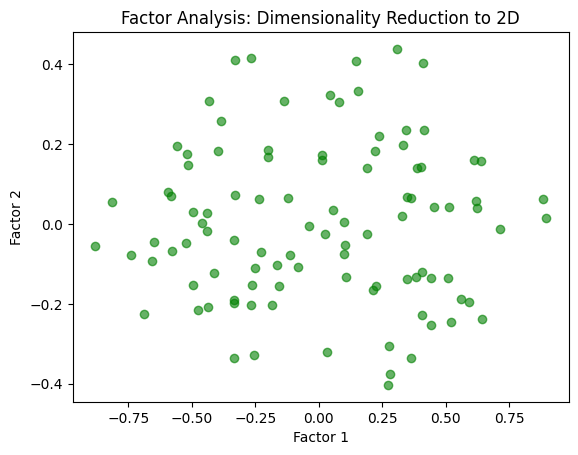

In [54]:
from sklearn.decomposition import FactorAnalysis

# Apply Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
X_fa = fa.fit_transform(X)

# Visualize Factor Analysis
plt.scatter(X_fa[:, 0], X_fa[:, 1], c='green', alpha=0.6)
plt.title("Factor Analysis: Dimensionality Reduction to 2D")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()


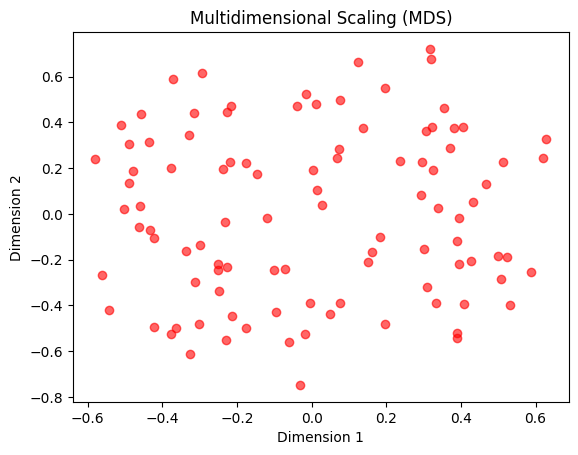

In [55]:
from sklearn.manifold import MDS

# Apply MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

# Visualize MDS
plt.scatter(X_mds[:, 0], X_mds[:, 1], c='red', alpha=0.6)
plt.title("Multidimensional Scaling (MDS)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


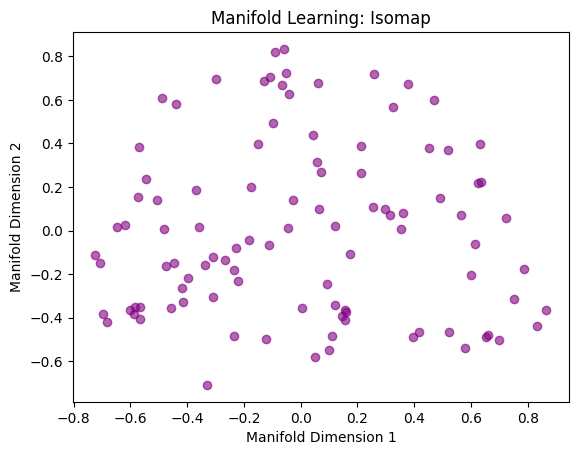

In [56]:
from sklearn.manifold import Isomap

# Apply Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

# Visualize Isomap
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c='purple', alpha=0.6)
plt.title("Manifold Learning: Isomap")
plt.xlabel("Manifold Dimension 1")
plt.ylabel("Manifold Dimension 2")
plt.show()


In [57]:
pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=e35146550736cc74134b156a43d8ea4f69ddd7fa5a57d2d9b9ebe9a60f96a729
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


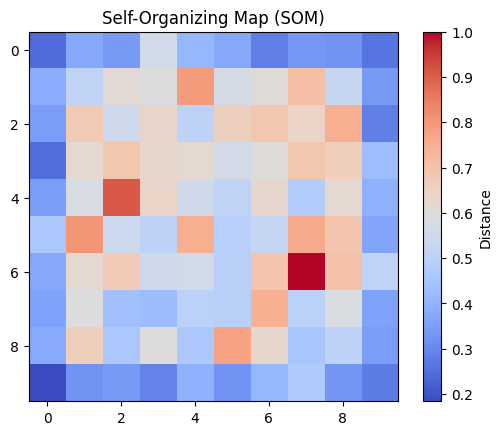

In [58]:
from minisom import MiniSom

# Apply SOM
som = MiniSom(x=10, y=10, input_len=3, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

# Plot SOM weights
plt.imshow(som.distance_map().T, cmap='coolwarm')
plt.title("Self-Organizing Map (SOM)")
plt.colorbar(label='Distance')
plt.show()


In [59]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"Cumulative Explained Variance: {cumulative_variance}")


Cumulative Explained Variance: [0.37743432 0.71389519]


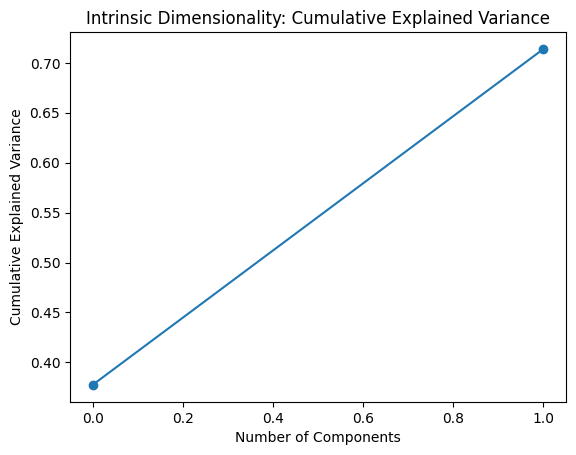

In [60]:
plt.plot(cumulative_variance, marker='o')
plt.title("Intrinsic Dimensionality: Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()


# MODULE 7

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable
y = 2.5 * X.squeeze() + np.random.randn(100) * 2  # Dependent variable with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)


In [62]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 2.61
R-squared Score: 0.95


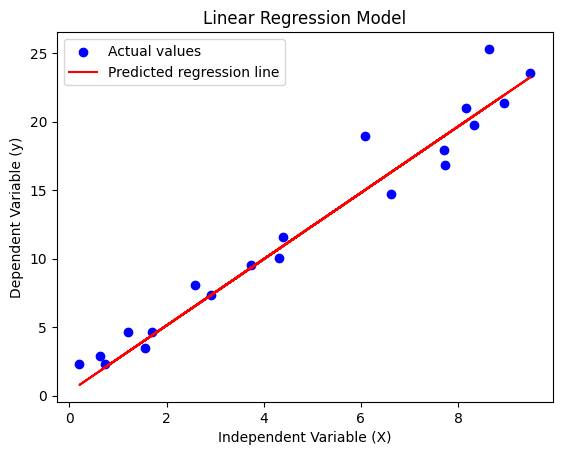

In [63]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Predicted regression line')
plt.title("Linear Regression Model")
plt.xlabel("Independent Variable (X)")
plt.ylabel("Dependent Variable (y)")
plt.legend()
plt.show()


In [64]:
import gym

# Create a reinforcement learning environment
env = gym.make('CartPole-v1')
state = env.reset()

# Run for a few episodes
for _ in range(5):
    done = False
    state = env.reset()
    while not done:
        env.render()  # Visualize the environment
        action = env.action_space.sample()  # Random action
        next_state, reward, done, info = env.step(action)

env.close()


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don